# Lenet-5 
## Imports

In [10]:
import tensorflow as tf
from tensorflow import keras 
from keras.datasets import cifar10
from keras.models import Sequential, Model 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt 

## Data Preperation

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [3]:
y_train.shape

(50000, 10)

In [4]:
x_validation = x_train[40000:]
y_validation = y_train[40000:]
x_train = x_train[:40000]
y_train = y_train[:40000]

print(f"""
Dataset Summary - 

Total classes = {num_classes}
Training shape = {x_train.shape}
Validation shape = {x_validation.shape}
Test shape = {x_test.shape}
      """)


Dataset Summary - 

Total classes = 10
Training shape = (40000, 32, 32, 3)
Validation shape = (10000, 32, 32, 3)
Test shape = (10000, 32, 32, 3)
      


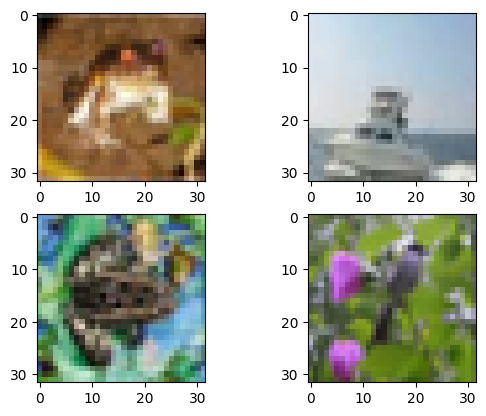

In [5]:
# Image Samples

plt.subplot(2,2,1)
plt.imshow(x_train[0])
plt.subplot(2,2,2)
plt.imshow(x_train[100])
plt.subplot(2,2,3)
plt.imshow(x_train[200])
plt.subplot(2,2,4)
plt.imshow(x_train[300])


## Model Overview

The original **LeNet-5** model, initially designed for the MNIST dataset, processes single-channel (gray-scale) images with dimensions of (32, 32, 1). In this implementation, we adapt the model for a 3-channel (RGB) image, and the architecture follows the principles of the modified **LeNet5-rgb** model.

### Adaptations:
1. **Input Image:**
   - Original: Single-channel (grayscale), size (32, 32, 1).
   - Adaptation: Three-channel (RGB), maintaining the size (32, 32, 3).

2. **Pooling Operation:**
   - Original: Utilizes Average Pooling.
   - Adaptation: Uses Max Pooling, enhancing the model's ability to capture dominant features.

3. **Optimizer:**
   - Original: Not explicitly specified in the paper.
   - Adaptation: Employs the Adam optimizer, a widely used optimization algorithm known for its efficiency and adaptability.

In [6]:
def cnn_model():
    model = Sequential([
        Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(16, (5, 5), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [14]:
checkpoint = ModelCheckpoint("model_weights_epoch_{epoch:02d}.h5", save_weights_only=True)
results = model.fit(x_train, y_train, validation_data=[x_validation, y_validation], batch_size=50, epochs=10)

Epoch 1/10
800/800 [==============================] - 20s 25ms/step - loss: 0.5334 - accuracy: 0.8091 - val_loss: 1.4649 - val_accuracy: 0.5971
Epoch 2/10
800/800 [==============================] - 19s 24ms/step - loss: 0.5037 - accuracy: 0.8203 - val_loss: 1.5023 - val_accuracy: 0.5999
Epoch 3/10
800/800 [==============================] - 21s 26ms/step - loss: 0.4865 - accuracy: 0.8239 - val_loss: 1.5553 - val_accuracy: 0.5952
Epoch 4/10
800/800 [==============================] - 17s 22ms/step - loss: 0.4678 - accuracy: 0.8320 - val_loss: 1.6203 - val_accuracy: 0.5925
Epoch 5/10
800/800 [==============================] - 17s 21ms/step - loss: 0.4637 - accuracy: 0.8324 - val_loss: 1.6299 - val_accuracy: 0.5900
Epoch 6/10
800/800 [==============================] - 18s 23ms/step - loss: 0.4411 - accuracy: 0.8417 - val_loss: 1.7534 - val_accuracy: 0.5806
Epoch 7/10
800/800 [==============================] - 17s 21ms/step - loss: 0.4214 - accuracy: 0.8499 - val_loss: 1.7991 - val_accuracy:

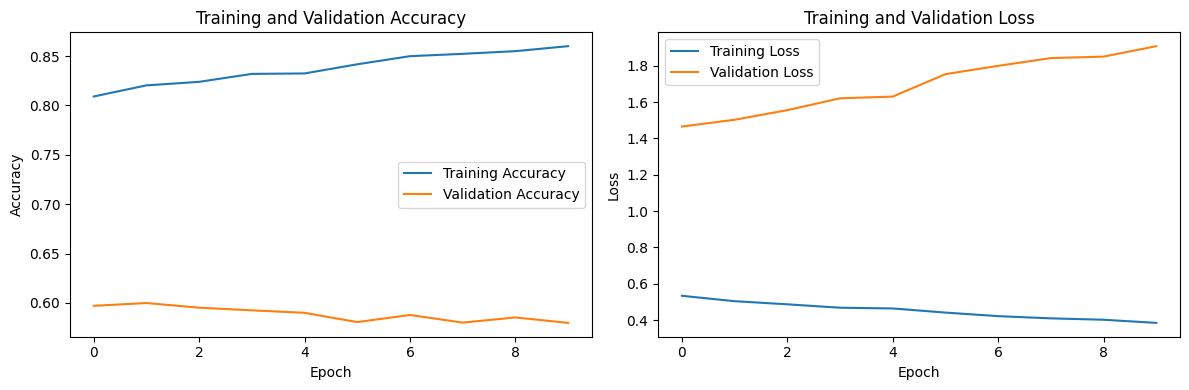

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(results.history['accuracy'], label='Training Accuracy')
axs[0].plot(results.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(results.history['loss'], label='Training Loss')
axs[1].plot(results.history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()


In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"test loss = {test_loss} \ntest accuracy = {test_accuracy}")

313/313 [==============================] - 2s 6ms/step - loss: 1.9490 - accuracy: 0.5800
test loss = 1.9489763975143433 
test accuracy = 0.5799999833106995
